In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Read CSV file
df = pd.read_csv('/content/data_export_icin.csv', sep=';')

In [3]:
#Print first 5 rows of dataframe
df.head(5)

,id,HbA1c,Hba1c_change,sex,age,LDL,Cholesterol,HDL,Creatinine,Triglyceride,...,insulin_reguler,linagliptin,metformin_hcl,nateglinid,pioglitazon_hcl,repaglinide,saksagliptin,sitagliptin,vildagliptin,Glycemic_control
0,0,10.3,0.234952,1,61,118.0,203.0,55.0,0.71,149.0,...,0.0,0.0,0.00,0.0,8.1,0.0,0.0,0.0,0.0,1
1,1,8.3,0.184793,2,65,92.0,189.0,63.0,1.01,253.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,8.0,0.174650,2,52,107.2,180.0,48.0,1.37,124.0,...,0.0,0.0,0.67,0.0,0.0,2.7,0.0,0.0,0.0,0
3,3,7.4,-0.073273,2,55,80.0,168.0,36.0,0.99,261.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,5.9,-0.031106,1,53,171.0,251.0,58.0,0.77,112.0,...,0.0,0.0,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
#Print Datatypes of variables
df.dtypes

id                    int64
HbA1c               float64
Hba1c_change        float64
sex                   int64
age                   int64
                     ...   
repaglinide         float64
saksagliptin        float64
sitagliptin         float64
vildagliptin        float64
Glycemic_control      int64
Length: 107, dtype: object

In [73]:
#Print Datatypes of all variables
for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")
    print()

Column Name: id
Data Type: int64

Column Name: HbA1c
Data Type: float64

Column Name: Hba1c_change
Data Type: float64

Column Name: sex
Data Type: int64

Column Name: age
Data Type: int64

Column Name: LDL
Data Type: float64

Column Name: Cholesterol
Data Type: float64

Column Name: HDL
Data Type: float64

Column Name: Creatinine
Data Type: float64

Column Name: Triglyceride
Data Type: float64

Column Name: infectious_diseases
Data Type: int64

Column Name: Malign_neoplasms
Data Type: int64

Column Name: Obesity
Data Type: int64

Column Name: Thyroid_dis
Data Type: int64

Column Name: neoplasms_unknown
Data Type: int64

Column Name: anemia
Data Type: int64

Column Name: vitamin_deficiency
Data Type: int64

Column Name: lipoprotein_met_dis
Data Type: int64

Column Name: hematologic_dis
Data Type: int64

Column Name: endocrine_other
Data Type: int64

Column Name: bipolar_affective_dis
Data Type: int64

Column Name: depression
Data Type: int64

Column Name: anxiety_dis
Data Type: int64

C

In [6]:
#Check for null values
df.isnull().sum().sum()

0

In [7]:
#Print dimension of dataset
df.shape

(77724, 107)

In [8]:
# Drop the id column since it will not be used anywhere
df.drop('id', axis=1, inplace=True)

# Change the data type of "Glycemic_control" to category for classification
df['Glycemic_control'] = df['Glycemic_control'].astype('category')

# Create new column named 'new_hba1c' for computation
df['new_hba1c'] = df['HbA1c'] + (df['HbA1c'] * df['Hba1c_change'] / 100)

# Replace values of sex column
df['sex'] = df['sex'].replace({1: 'Female', 2: 'Male'})

# Replace values of Glycemic_control and create new column
df['Glycemic_control_text'] = df['Glycemic_control'].replace({0: 'Under control', 1: 'Poor control'})

In [9]:
# New dimension of dataset
df.shape

(77724, 108)

In [10]:
#Check for any irregular value in age column
age_min = df['age'].min()
age_max = df['age'].max()
print(age_min)
print(age_max)

1
101


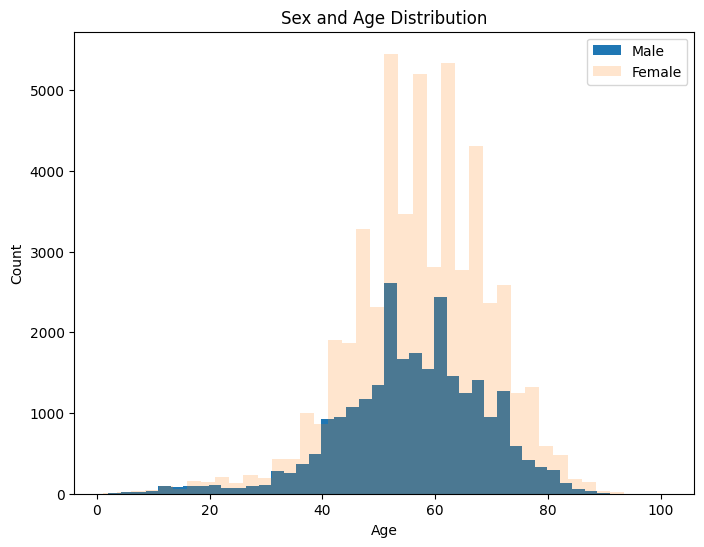

In [11]:
# Plot the histogram of sex and age distribution of population dataset
plt.figure(figsize=(8, 6))
plt.hist(df[df['sex'] == 'Male']['age'], bins=40, alpha=1, label='Male')
plt.hist(df[df['sex'] == 'Female']['age'], bins=40, alpha=0.2, label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Sex and Age Distribution')
plt.legend()
plt.show()

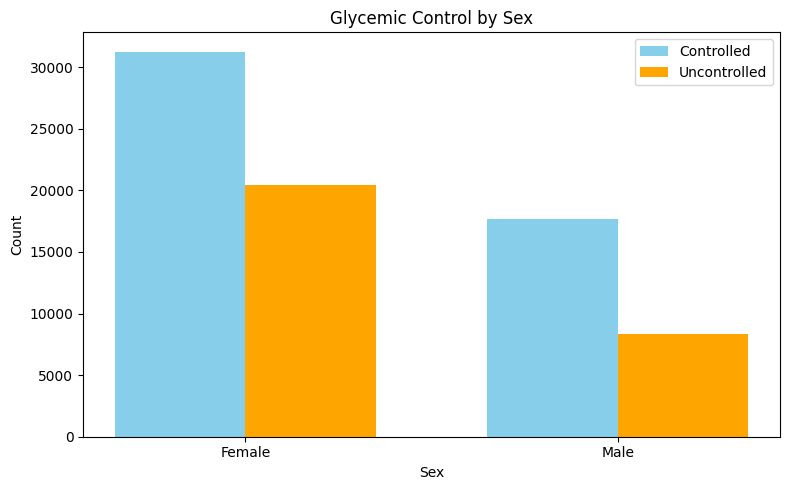

In [12]:
#Create filtered data for specifically analysing Glycemic_control by sex
age_sex_control = df[(df['Glycemic_control'] == 1)][['sex']]
age_sex_uncontrol = df[(df['Glycemic_control'] == 0)][['sex']]

fig, ax = plt.subplots(figsize=(8, 5))

# Count the number of males and females in each group
control_counts = age_sex_control['sex'].value_counts()
uncontrol_counts = age_sex_uncontrol['sex'].value_counts()

# Plot the bar chart
x = np.arange(len(control_counts))
width = 0.35
ax.bar(x - width/2, control_counts, width, label='Controlled', color='skyblue')
ax.bar(x + width/2, uncontrol_counts, width, label='Uncontrolled', color='orange')

# Set the x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(control_counts.index)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Glycemic Control by Sex')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

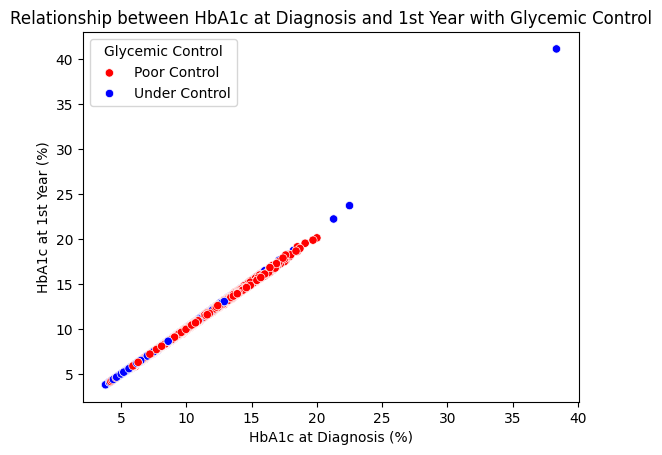

In [13]:
#Create a scatterplot of old and new HbA1c levels based on Glycemic_control
sns.scatterplot(x=df['HbA1c'], y=df['new_hba1c'], hue=df['Glycemic_control'], palette=['blue', 'red'])

# Add legend and labels
plt.legend(title='Glycemic Control', labels=['Poor Control', 'Under Control'])
plt.xlabel('HbA1c at Diagnosis (%)')
plt.ylabel('HbA1c at 1st Year (%)')
plt.title('Relationship between HbA1c at Diagnosis and 1st Year with Glycemic Control')

# Show the plot
plt.show()

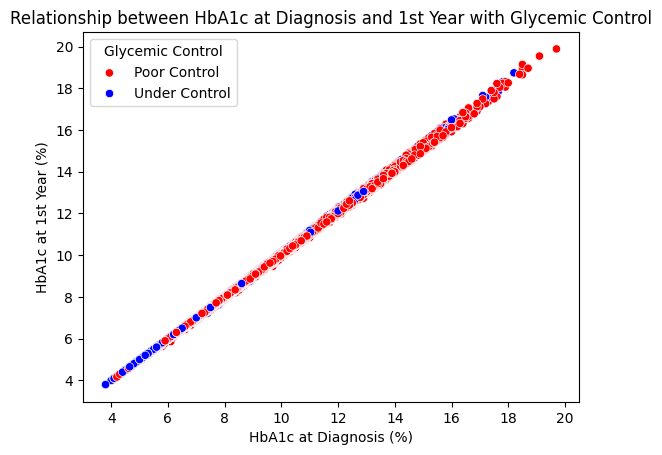

In [14]:
#From previous plot, few outliers can be observed. Hence removing those values and replotting the scatterplot.
hb_graph=df[(df['HbA1c'] < 20)]
sns.scatterplot(x=hb_graph['HbA1c'], y=hb_graph['new_hba1c'], hue=hb_graph['Glycemic_control'], palette=['blue', 'red'])

# Add legend and labels
plt.legend(title='Glycemic Control', labels=['Poor Control', 'Under Control'])
plt.xlabel('HbA1c at Diagnosis (%)')
plt.ylabel('HbA1c at 1st Year (%)')
plt.title('Relationship between HbA1c at Diagnosis and 1st Year with Glycemic Control')

# Show the plot
plt.show()

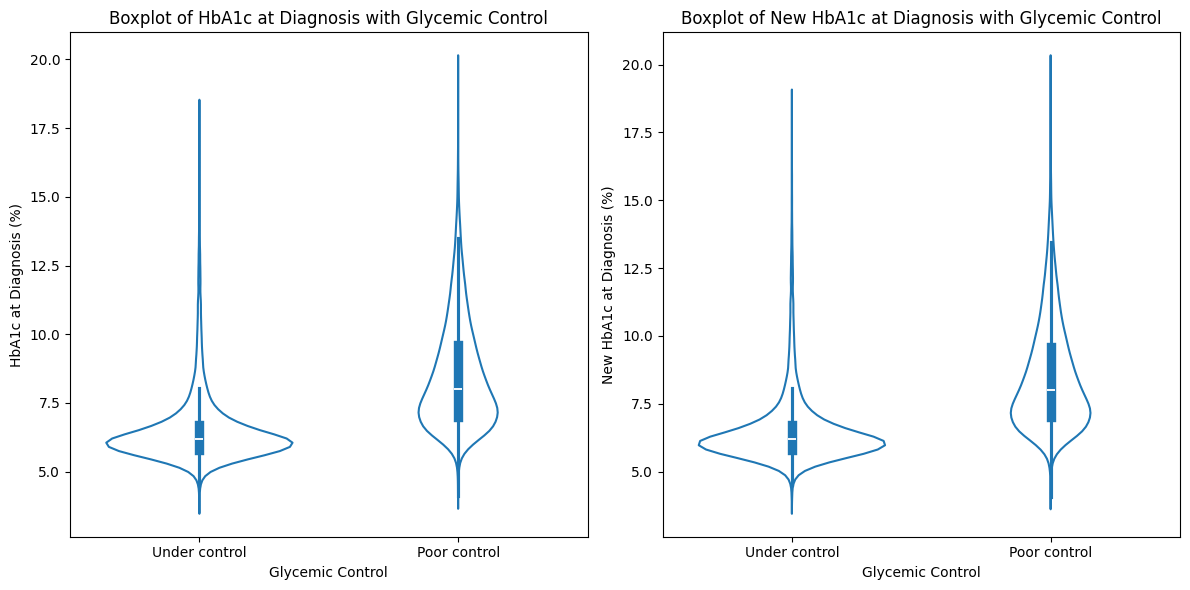

In [15]:
# Create a subplot with two boxplots of HbA1c Levels
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for HbA1c at Diagnosis
sns.violinplot(x=hb_graph['Glycemic_control_text'], y=hb_graph['HbA1c'], ax=axs[0],fill=False, gap=.1)
axs[0].set_xlabel('Glycemic Control')
axs[0].set_ylabel('HbA1c at Diagnosis (%)')
axs[0].set_title('Boxplot of HbA1c at Diagnosis with Glycemic Control')

# Boxplot for New HbA1c at Diagnosis
sns.violinplot(x=hb_graph['Glycemic_control_text'], y=hb_graph['new_hba1c'], ax=axs[1],fill=False, gap=.1)
axs[1].set_xlabel('Glycemic Control')
axs[1].set_ylabel('New HbA1c at Diagnosis (%)')
axs[1].set_title('Boxplot of New HbA1c at Diagnosis with Glycemic Control')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

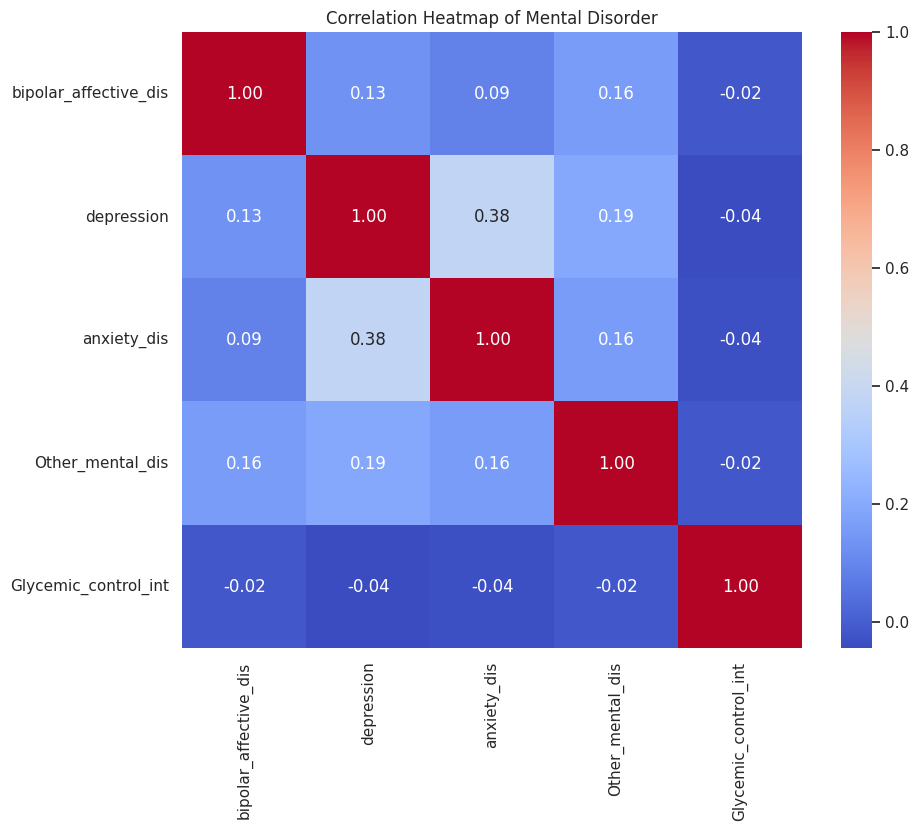

In [16]:
#For heatmap, all data should be numerical, hence creating new column and changing the datatype of variable.
df['Glycemic_control_int']=df['Glycemic_control']
df['Glycemic_control_int'] = df['Glycemic_control_int'].astype('int')

sns.set(style="white")

# Select the columns of interest
columns_of_interest = ['bipolar_affective_dis','depression','anxiety_dis','Other_mental_dis','Glycemic_control_int']

# Create a correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Heatmap of Mental Disorder')

# Show the plot
plt.show()

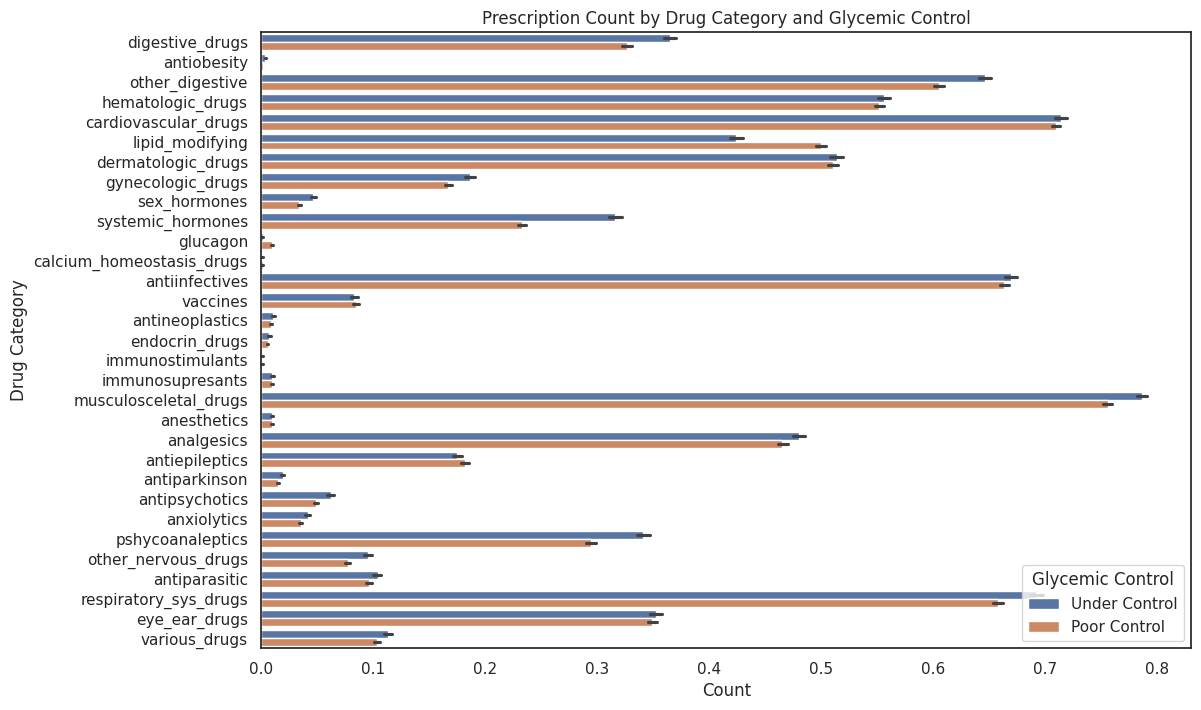

In [275]:
#Filtering data for specifically on different drug bar plot
drugs= df[['digestive_drugs','antiobesity','other_digestive','hematologic_drugs','cardiovascular_drugs','lipid_modifying','dermatologic_drugs','gynecologic_drugs','sex_hormones','systemic_hormones','glucagon','calcium_homeostasis_drugs','antiinfectives','vaccines','antineoplastics','endocrin_drugs','immunostimulants','immunosupresants','musculosceletal_drugs','anesthetics','analgesics','antiepileptics','antiparkinson','antipsychotics','anxiolytics','pshycoanaleptics','other_nervous_drugs','antiparasitic','respiratory_sys_drugs','eye_ear_drugs','various_drugs','Glycemic_control']]

# Melt the DataFrame for easier plotting with seaborn
df_melted = drugs.melt(id_vars='Glycemic_control', var_name='Drug Category', value_name='Prescribed')

# Replace 0 with 'Under Control' and 1 with 'Poor Control' in the Glycemic_control column
df_melted['Glycemic_control'] = df_melted['Glycemic_control'].replace({0: 'Under Control', 1: 'Poor Control'})

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, y='Drug Category', x='Prescribed', hue='Glycemic_control', orient='h')
plt.xlabel('Count')
plt.ylabel('Drug Category')
plt.title('Prescription Count by Drug Category and Glycemic Control')
plt.legend(title='Glycemic Control', loc='lower right')
plt.show()

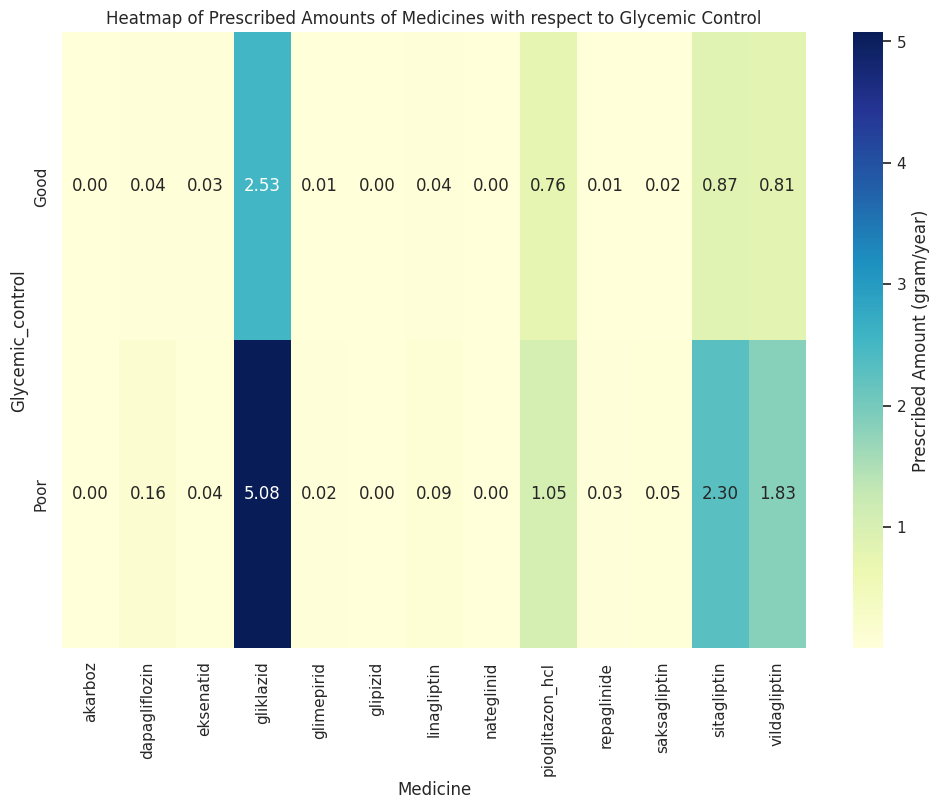

In [17]:
# Create a heatmap focusing on different medicines used.
medicine_data=df[['akarboz','dapagliflozin','eksenatid','gliklazid','glimepirid','glipizid','linagliptin','nateglinid','pioglitazon_hcl','repaglinide','saksagliptin','sitagliptin','vildagliptin','Glycemic_control']]
melted_data = pd.melt(medicine_data, id_vars=['Glycemic_control'], var_name='Medicine', value_name='Prescribed_Amount')
melted_data['Glycemic_control'] = melted_data['Glycemic_control'].replace({0: 'Good', 1: 'Poor'})

plt.figure(figsize=(12, 8))
heatmap_data = melted_data.pivot_table(index='Glycemic_control', columns='Medicine', values='Prescribed_Amount', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Prescribed Amount (gram/year)'})
plt.title('Heatmap of Prescribed Amounts of Medicines with respect to Glycemic Control')
plt.show()

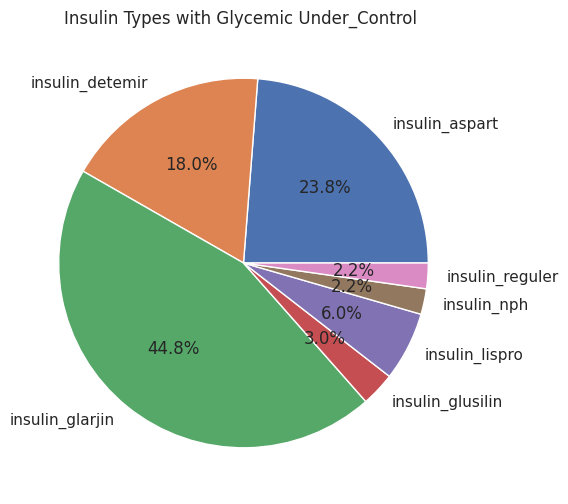

In [18]:
# Filter the dataset for glycemic_control=0
df_glycemic_0 = df[df['Glycemic_control'] == 0][['insulin_aspart','insulin_detemir','insulin_glarjin','insulin_glusilin','insulin_lispro','insulin_nph','insulin_reguler','Glycemic_control']]

# Count the occurrences of each insulin type
insulin_counts_0 = df_glycemic_0.iloc[:, :-1].sum()

# Create a pie chart for glycemic_control=0
plt.figure(figsize=(8, 6))
plt.pie(insulin_counts_0, labels=insulin_counts_0.index, autopct='%1.1f%%')
plt.title('Insulin Types with Glycemic Under_Control ')
plt.show()




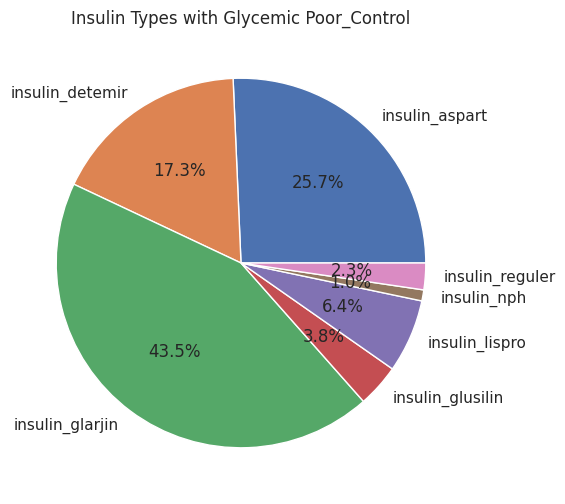

In [19]:
# Filter the dataset for glycemic_control=1
df_glycemic_1 = df[df['Glycemic_control'] == 1][['insulin_aspart','insulin_detemir','insulin_glarjin','insulin_glusilin','insulin_lispro','insulin_nph','insulin_reguler','Glycemic_control']]

# Count the occurrences of each insulin type
insulin_counts_1 = df_glycemic_1.iloc[:, :-1].sum()

# Create a pie chart for glycemic_control=1
plt.figure(figsize=(8, 6))
plt.pie(insulin_counts_1, labels=insulin_counts_1.index, autopct='%1.1f%%')
plt.title('Insulin Types with Glycemic Poor_Control')
plt.show()

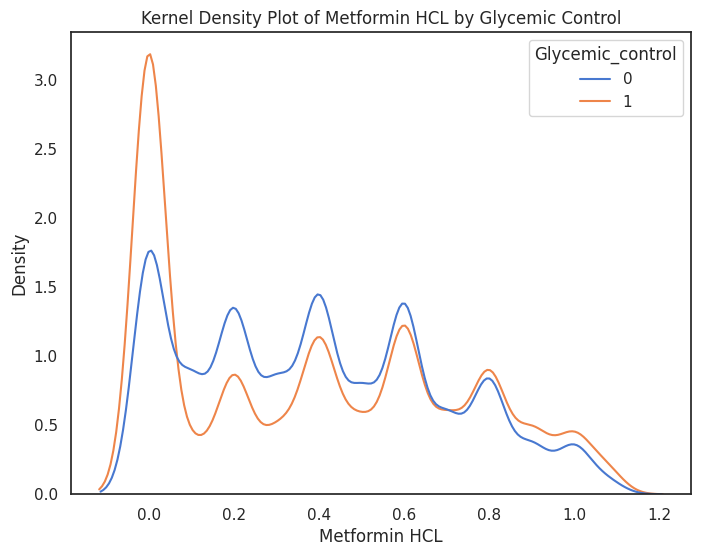

In [20]:
# Create a kernel density plot for metformin consumption
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='metformin_hcl', hue='Glycemic_control', fill=False, common_norm=False, palette='muted')
plt.title('Kernel Density Plot of Metformin HCL by Glycemic Control')
plt.xlabel('Metformin HCL')
plt.ylabel('Density')
plt.show()
